## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading data set

In [4]:
data = pd.read_csv('car_age_price.csv')

## Observing data details 

In [6]:
data.shape 

(112, 2)

In [7]:
#from above understood 112 rows are present data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


## 5 number summary (statistical summary)

In [8]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


## Handling missing values 

In [10]:
data.isna().sum()

Year     0
Price    0
dtype: int64

## Outlier handling

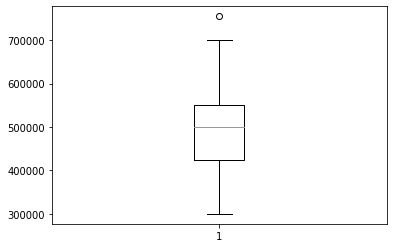

In [13]:
plt.boxplot(data['Price'])
plt.show()    

In [14]:
Q1 = np.percentile(data['Price'],25,interpolation='midpoint')
Q2 = np.percentile(data['Price'],50,interpolation='midpoint')
Q3 = np.percentile(data['Price'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

422500.0
500000.0
550000.0


In [16]:
#find interquartile range
IQR = Q3 - Q1

#lower limit
low_limit = Q1 - (1.5*IQR)

#upper limit 
upp_limit = Q3 + (1.5*IQR)

#outliers -> values above upp_limit and values below low_limit
print(low_limit)
print(upp_limit)

231250.0
741250.0


In [19]:
#outliers list
outlier = []
for x in data['Price']:
    if (x > upp_limit) or (x < low_limit):
        outlier.append(x)
outlier

[755000]

In [21]:
#removing outliers (only one outlier value) by finding indices
ind = data['Price']>upp_limit
data.loc[ind].index
data.drop([1],inplace=True)

## Importing libraries for regression

In [24]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## split the dataset into a training set and a test set

In [47]:
X = data[['Year']]
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Create and train linear regression model

In [48]:
lin_r = LinearRegression()
model = lin_r.fit(X_train, y_train)
lin_predictions = model.predict(X_test)

Coefficients: [40834.44994829]
Intercept: -81862721.56277145


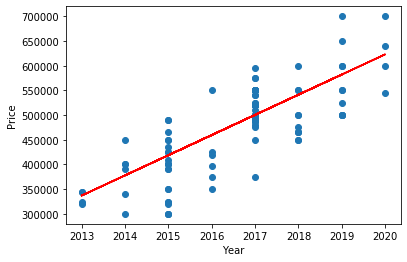

In [53]:
# Printing the coefficients and intercept
print('Coefficients:', lin_r.coef_)
print('Intercept:', lin_r.intercept_)

# Plotting the linear regression line
plt.scatter(X, y)
plt.plot(X, lin_r.predict(X), color='red')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

In [49]:
#to evaluate the model perfomance, here using the mean squared error (MSE) metrics on the data set
mse = mean_squared_error(y_test,lin_predictions)
print('Linear Regression MSE:', mse.round(2))

Linear Regression MSE: 2360736941.05


#### Linear Regression MSE: 2360736941.05

In [50]:
year_2022 = [[2022]]
linear_pred = lin_r.predict(year_2022)
print('Linear Regression Prediction for 2022:', linear_pred[0].round(2))

Linear Regression Prediction for 2022: 704536.23


C:\Users\farsana\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


# Linear Regression Prediction for 2022: 704536.23

## Create and train lasso regression model

In [51]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_model = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, lasso_model)
print('Lasso Regression MSE:', mse_lasso.round(2))

Lasso Regression MSE: 2360738206.86


####  Lasso Regression MSE: 2360738206.86

In [52]:
year_2022 = [[2022]]
lasso_pred = lasso.predict(year_2022)
print('Lasso Regression Prediction for 2022:', lasso_pred[0].round(2))

Lasso Regression Prediction for 2022: 704536.02


C:\Users\farsana\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  "X does not have valid feature names, but"


### Lasso Regression Prediction for 2022: 704536.02

### We can compare the MSE values to determine which model is performing better. 
### A lower MSE value indicates a better performance. 
### The model with the lower MSE value is considered the better model.

### Hence linear regression model is better here.
